# Exploring the UK bonds (Gilts)

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [47]:
df = pd.read_csv("C:/Andre files/UK Gilts/Purchased_price.csv")
df.head() 

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest
0,UKT 0.75 07/23,20/04/2023,GB00BF0HZ991,Conventional,0.75,22/07/2023,99.125,99.309392,114,4.166506,0.254800,0.184392
1,UKT 0.75 07/23,21/04/2023,GB00BF0HZ991,Conventional,0.75,22/07/2023,99.148,99.338608,107,4.184635,0.246741,0.190608
2,UKT 0.75 07/23,24/04/2023,GB00BF0HZ991,Conventional,0.75,22/07/2023,99.164,99.356680,111,4.156595,0.244074,0.192680
3,UKT 0.75 07/23,25/04/2023,GB00BF0HZ991,Conventional,0.75,22/07/2023,99.193,99.387751,97,4.073770,0.241437,0.194751
4,UKT 0.75 07/23,26/04/2023,GB00BF0HZ991,Conventional,0.75,22/07/2023,99.197,99.393823,96,4.094474,0.238739,0.196823


In [48]:
df.tail()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest
295,UKT 1.125 10/73,20/04/2023,GB00BLBDX619,Conventional,1.125,22/10/2073,41.30,41.296909,109,3.702560,29.861915,-0.003091
296,UKT 1.125 10/73,21/04/2023,GB00BLBDX619,Conventional,1.125,22/10/2073,41.45,41.456148,98,3.690687,29.896671,0.006148
297,UKT 1.125 10/73,24/04/2023,GB00BLBDX619,Conventional,1.125,22/10/2073,41.56,41.569221,105,3.681914,29.925618,0.009221
298,UKT 1.125 10/73,25/04/2023,GB00BLBDX619,Conventional,1.125,22/10/2073,42.23,42.242295,111,3.628740,30.114533,0.012295
299,UKT 1.125 10/73,26/04/2023,GB00BLBDX619,Conventional,1.125,22/10/2073,41.97,41.985369,100,3.649352,30.037605,0.015369


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gilt Name               300 non-null    object 
 1   Close of Business Date  300 non-null    object 
 2   ISIN                    300 non-null    object 
 3   Type                    300 non-null    object 
 4   Coupon                  300 non-null    float64
 5   Maturity                300 non-null    object 
 6   Clean Price             300 non-null    float64
 7   Dirty Price             300 non-null    float64
 8   Purchased_Price         300 non-null    int64  
 9   Yield                   300 non-null    float64
 10  Mod Duration            300 non-null    float64
 11  Accrued Interest        300 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 28.2+ KB


Format the dates for a more conventional manipulation

In [50]:
df['Close of Business Date'] = pd.to_datetime(df['Close of Business Date'], format='%d/%m/%Y')

In [51]:
df['Maturity'] = pd.to_datetime(df['Maturity'], format='%d/%m/%Y')

In [52]:
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest
0,UKT 0.75 07/23,2023-04-20,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.125,99.309392,114,4.166506,0.254800,0.184392
1,UKT 0.75 07/23,2023-04-21,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.148,99.338608,107,4.184635,0.246741,0.190608
2,UKT 0.75 07/23,2023-04-24,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.164,99.356680,111,4.156595,0.244074,0.192680
3,UKT 0.75 07/23,2023-04-25,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.193,99.387751,97,4.073770,0.241437,0.194751
4,UKT 0.75 07/23,2023-04-26,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.197,99.393823,96,4.094474,0.238739,0.196823


In [53]:
# Finding missing values
df.isna().sum().sort_values(ascending=False)

Gilt Name                 0
Close of Business Date    0
ISIN                      0
Type                      0
Coupon                    0
Maturity                  0
Clean Price               0
Dirty Price               0
Purchased_Price           0
Yield                     0
Mod Duration              0
Accrued Interest          0
dtype: int64

#### Let's start by analysing 
### Gilt name

In [54]:
Gilt_name = df['Gilt Name'].unique()
len(Gilt_name) 

60

In [55]:
# Group by Gilt Name and Coupon
grouped = df.groupby(['Gilt Name'])[['Coupon']].mean()

print(grouped)

                 Coupon
Gilt Name              
UKT 0.125 01/24   0.125
UKT 0.125 01/26   0.125
UKT 0.125 01/28   0.125
UKT 0.25 01/25    0.250
UKT 0.25 07/31    0.250
UKT 0.375 10/26   0.375
UKT 0.375 10/30   0.375
UKT 0.5 01/29     0.500
UKT 0.5 10/61     0.500
UKT 0.625 06/25   0.625
UKT 0.625 07/35   0.625
UKT 0.625 10/50   0.625
UKT 0.75 07/23    0.750
UKT 0.875 01/46   0.875
UKT 0.875 07/33   0.875
UKT 0.875 10/29   0.875
UKT 1 01/32       1.000
UKT 1 04/24       1.000
UKT 1.125 01/39   1.125
UKT 1.125 10/73   1.125
UKT 1.25 07/27    1.250
UKT 1.25 07/51    1.250
UKT 1.25 10/41    1.250
UKT 1.5 07/26     1.500
UKT 1.5 07/47     1.500
UKT 1.5 07/53     1.500
UKT 1.625 10/28   1.625
UKT 1.625 10/54   1.625
UKT 1.625 10/71   1.625
UKT 1.75 01/49    1.750
UKT 1.75 07/57    1.750
UKT 1.75 09/37    1.750
UKT 2 09/25       2.000
UKT 2.25 09/23    2.250
UKT 2.5 07/65     2.500
UKT 2.75 09/24    2.750
UKT 3.25 01/33    3.250
UKT 3.25 01/44    3.250
UKT 3.5 01/45     3.500
UKT 3.5 07/68   

### Coupon

In [56]:
df.Coupon.describe()

count    300.000000
mean       2.331250
std        1.630894
min        0.125000
25%        0.875000
50%        1.750000
75%        4.031250
max        6.000000
Name: Coupon, dtype: float64

In [57]:
group_coupon = df['Coupon'].unique()
len(group_coupon) 

27

In [58]:
# Group by Gilt Name and Coupon
grouped = df.groupby(['Gilt Name'])[['Coupon']].sum()

print(grouped)

                 Coupon
Gilt Name              
UKT 0.125 01/24   0.625
UKT 0.125 01/26   0.625
UKT 0.125 01/28   0.625
UKT 0.25 01/25    1.250
UKT 0.25 07/31    1.250
UKT 0.375 10/26   1.875
UKT 0.375 10/30   1.875
UKT 0.5 01/29     2.500
UKT 0.5 10/61     2.500
UKT 0.625 06/25   3.125
UKT 0.625 07/35   3.125
UKT 0.625 10/50   3.125
UKT 0.75 07/23    3.750
UKT 0.875 01/46   4.375
UKT 0.875 07/33   4.375
UKT 0.875 10/29   4.375
UKT 1 01/32       5.000
UKT 1 04/24       5.000
UKT 1.125 01/39   5.625
UKT 1.125 10/73   5.625
UKT 1.25 07/27    6.250
UKT 1.25 07/51    6.250
UKT 1.25 10/41    6.250
UKT 1.5 07/26     7.500
UKT 1.5 07/47     7.500
UKT 1.5 07/53     7.500
UKT 1.625 10/28   8.125
UKT 1.625 10/54   8.125
UKT 1.625 10/71   8.125
UKT 1.75 01/49    8.750
UKT 1.75 07/57    8.750
UKT 1.75 09/37    8.750
UKT 2 09/25      10.000
UKT 2.25 09/23   11.250
UKT 2.5 07/65    12.500
UKT 2.75 09/24   13.750
UKT 3.25 01/33   16.250
UKT 3.25 01/44   16.250
UKT 3.5 01/45    17.500
UKT 3.5 07/68   

#### Let's get the difference between clean price and dirty price of these bonds

In [59]:
# calculate price difference
df['Price_Diff'] = df['Dirty Price'] - df['Clean Price']
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff
0,UKT 0.75 07/23,2023-04-20,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.125,99.309392,114,4.166506,0.254800,0.184392,0.184392
1,UKT 0.75 07/23,2023-04-21,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.148,99.338608,107,4.184635,0.246741,0.190608,0.190608
2,UKT 0.75 07/23,2023-04-24,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.164,99.356680,111,4.156595,0.244074,0.192680,0.192680
3,UKT 0.75 07/23,2023-04-25,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.193,99.387751,97,4.073770,0.241437,0.194751,0.194751
4,UKT 0.75 07/23,2023-04-26,GB00BF0HZ991,Conventional,0.75,2023-07-22,99.197,99.393823,96,4.094474,0.238739,0.196823,0.196823


#### Let's calculate the Flat Yield 

Flat Yield = Gross Coupon / Market Price * 100

In [60]:
df['Flat_Yield'] = df['Coupon'] / df['Dirty Price'] * 100
df = df.sort_values('Flat_Yield', ascending=True)
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff,Flat_Yield
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,0.740635,0.029696,0.029696,0.128791
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,0.743096,0.029351,0.029351,0.128824
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,0.744918,0.029006,0.029006,0.128968
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,0.747197,0.028660,0.028660,0.129033
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,0.755118,0.027624,0.027624,0.129038


In [61]:
# create a column if Flat Yield greater than 2%

In [62]:
# Create the new total table
df['Yield_excess/Yield_under'] = df['Flat_Yield'].apply(lambda x: 'excess' if x > 2 else 'under')
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff,Flat_Yield,Yield_excess/Yield_under
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,0.740635,0.029696,0.029696,0.128791,under
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,0.743096,0.029351,0.029351,0.128824,under
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,0.744918,0.029006,0.029006,0.128968,under
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,0.747197,0.028660,0.028660,0.129033,under
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,0.755118,0.027624,0.027624,0.129038,under


In [63]:
df['Yield_excess/Yield_under'].count()

300

In [64]:
# Group by Gilt Name and Coupon
Yield = df.groupby(['Yield_excess/Yield_under'])[['Gilt Name']].count()

print(Yield)

                          Gilt Name
Yield_excess/Yield_under           
excess                          185
under                           115


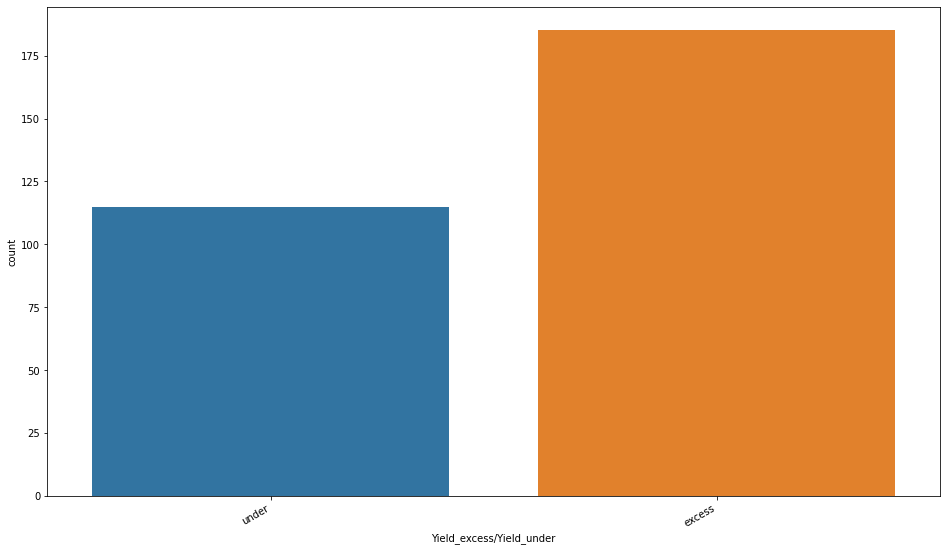

In [65]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x = 'Yield_excess/Yield_under', data = df)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [66]:
# Get the percentage of Yield excess/Yield under
Perc_limit = df['Yield_excess/Yield_under'].value_counts()
Percentage_limit = 100 * Perc_limit / len(df)
print(Percentage_limit)

excess    61.666667
under     38.333333
Name: Yield_excess/Yield_under, dtype: float64


#### Calculate the Gross Redemption Yield

Holding Period of Return

HPR = Nominal price - Purchased Price / Purchased Price

Annualised gain/loss = HPR / Years to maturity

GRY = Flat Yield +- Annualised gain/loss

In [67]:
# let's get the Years to maturity first. 

current_date = datetime.now()
df['Years_to_Maturity'] = (df['Maturity'] - current_date).dt.days / 365.25 # 365.25 to account for leap years
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff,Flat_Yield,Yield_excess/Yield_under,Years_to_Maturity
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,0.740635,0.029696,0.029696,0.128791,under,0.673511
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,0.743096,0.029351,0.029351,0.128824,under,0.673511
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,0.744918,0.029006,0.029006,0.128968,under,0.673511
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,0.747197,0.028660,0.028660,0.129033,under,0.673511
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,0.755118,0.027624,0.027624,0.129038,under,0.673511


In [68]:
# HPR
df['HPR'] = df['Dirty Price'] - df['Purchased_Price'] / df['Purchased_Price'] * 100
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff,Flat_Yield,Yield_excess/Yield_under,Years_to_Maturity,HPR
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,0.740635,0.029696,0.029696,0.128791,under,0.673511,-2.943304
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,0.743096,0.029351,0.029351,0.128824,under,0.673511,-2.968649
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,0.744918,0.029006,0.029006,0.128968,under,0.673511,-3.076994
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,0.747197,0.028660,0.028660,0.129033,under,0.673511,-3.125340
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,0.755118,0.027624,0.027624,0.129038,under,0.673511,-3.129376


In [69]:
df['Annualised_gain_x_loss'] = df['HPR'] / df['Years_to_Maturity']
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff,Flat_Yield,Yield_excess/Yield_under,Years_to_Maturity,HPR,Annualised_gain_x_loss
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,0.740635,0.029696,0.029696,0.128791,under,0.673511,-2.943304,-4.370089
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,0.743096,0.029351,0.029351,0.128824,under,0.673511,-2.968649,-4.407720
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,0.744918,0.029006,0.029006,0.128968,under,0.673511,-3.076994,-4.568586
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,0.747197,0.028660,0.028660,0.129033,under,0.673511,-3.125340,-4.640368
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,0.755118,0.027624,0.027624,0.129038,under,0.673511,-3.129376,-4.646360


In [70]:
df['GRY'] = df['Flat_Yield'] + df['Annualised_gain_x_loss']
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff,Flat_Yield,Yield_excess/Yield_under,Years_to_Maturity,HPR,Annualised_gain_x_loss,GRY
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,0.740635,0.029696,0.029696,0.128791,under,0.673511,-2.943304,-4.370089,-4.241298
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,0.743096,0.029351,0.029351,0.128824,under,0.673511,-2.968649,-4.407720,-4.278895
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,0.744918,0.029006,0.029006,0.128968,under,0.673511,-3.076994,-4.568586,-4.439617
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,0.747197,0.028660,0.028660,0.129033,under,0.673511,-3.125340,-4.640368,-4.511335
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,0.755118,0.027624,0.027624,0.129038,under,0.673511,-3.129376,-4.646360,-4.517322


In [71]:
# Create the new total table
df['GRY_posite/negative'] = df['GRY'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,Mod Duration,Accrued Interest,Price_Diff,Flat_Yield,Yield_excess/Yield_under,Years_to_Maturity,HPR,Annualised_gain_x_loss,GRY,GRY_posite/negative
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,0.740635,0.029696,0.029696,0.128791,under,0.673511,-2.943304,-4.370089,-4.241298,Negative
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,0.743096,0.029351,0.029351,0.128824,under,0.673511,-2.968649,-4.407720,-4.278895,Negative
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,0.744918,0.029006,0.029006,0.128968,under,0.673511,-3.076994,-4.568586,-4.439617,Negative
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,0.747197,0.028660,0.028660,0.129033,under,0.673511,-3.125340,-4.640368,-4.511335,Negative
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,0.755118,0.027624,0.027624,0.129038,under,0.673511,-3.129376,-4.646360,-4.517322,Negative


In [72]:
# Group by Gilt Name and Coupon
GRY_group = df.groupby(['GRY_posite/negative'])[['Gilt Name']].count()

print(GRY_group)

                     Gilt Name
GRY_posite/negative           
Negative                   112
Positive                   188


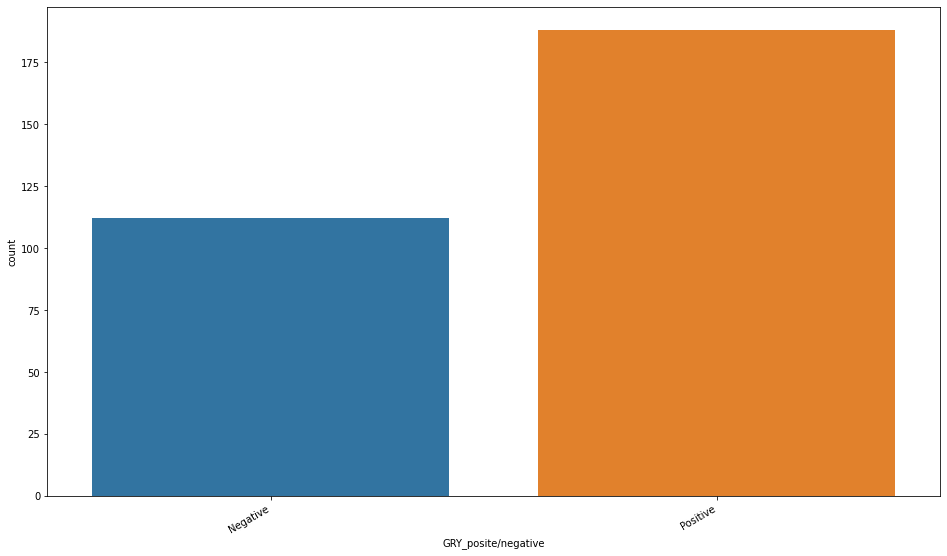

In [73]:
fig, ax = plt.subplots(figsize=(16,9))
sns.countplot(x = 'GRY_posite/negative', data = df)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [74]:
# Get the percentage of GRY
Perc_limit_GRY_1 = df['GRY_posite/negative'].value_counts()
Percentage_limit_GRY = 100 * Perc_limit_GRY_1 / len(df)
print(Percentage_limit_GRY)

Positive    62.666667
Negative    37.333333
Name: GRY_posite/negative, dtype: float64


### As a result, 61.7% of the bonds have a GRY Positive and 38.3% Negative

## Since the modified duration has been given, we can calculate the current price of each
## gilt given a % change on the interest rate (banks rate)


Duration is a measure of the sensitivity of a bond's price or the value of a fixed-income investment to changes in interest rates. It is an important metric used by investors to assess the interest rate risk associated with their bond holdings.

Duration takes into account several factors, including the bond's time to maturity, coupon rate, and yield. It provides an estimate of the weighted average time it takes to receive the bond's cash flows, considering both the timing and the present value of each cash flow.

Here are a few key points to understand about duration:

Time Weighting: Duration is a time-weighted measure, meaning it considers the timing of cash flows. It accounts for the fact that cash flows received earlier have a higher present value compared to those received later.

Macaulay Duration: The most commonly used form of duration is Macaulay duration, named after economist Frederick Macaulay. It calculates the weighted average time to receive the bond's cash flows, with each cash flow weighted by its present value.

Price Sensitivity: Duration provides an indication of how much a bond's price is expected to change in response to a change in interest rates. Generally, the higher the duration, the more sensitive the bond's price will be to interest rate movements.

Inverse Relationship: Duration has an inverse relationship with interest rates. When interest rates rise, the value of a bond with a longer duration tends to decline more compared to a bond with a shorter duration. Conversely, when interest rates fall, a bond with a longer duration may experience a larger price increase.

Duration and Coupon Payments: Duration considers both the bond's periodic coupon payments and the principal repayment at maturity. The presence of coupon payments helps to offset some of the price impact resulting from changes in interest rates.

By understanding duration, investors can assess the potential impact of interest rate changes on their bond investments and make informed decisions about portfolio management and risk mitigation.

#### The formula is:

### Δ Current price = -MD x Δ Yield x Current price

In [75]:
# Apply the calculation
if 'Mod Duration' in df.columns:
    df['new_duration'] = -df['Mod Duration']
    df['price_sensitivity'] = df.apply(lambda row: row['new_duration'] * 0.01 * row['Dirty Price'], axis=1)
else:
    print("Column 'Mod Duration' does not exist in the DataFrame.")

In [76]:
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,...,Price_Diff,Flat_Yield,Yield_excess/Yield_under,Years_to_Maturity,HPR,Annualised_gain_x_loss,GRY,GRY_posite/negative,new_duration,price_sensitivity
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,...,0.029696,0.128791,under,0.673511,-2.943304,-4.370089,-4.241298,Negative,-0.740635,-0.718836
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,...,0.029351,0.128824,under,0.673511,-2.968649,-4.407720,-4.278895,Negative,-0.743096,-0.721036
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,...,0.029006,0.128968,under,0.673511,-3.076994,-4.568586,-4.439617,Negative,-0.744918,-0.721997
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,...,0.028660,0.129033,under,0.673511,-3.125340,-4.640368,-4.511335,Negative,-0.747197,-0.723845
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,...,0.027624,0.129038,under,0.673511,-3.129376,-4.646360,-4.517322,Negative,-0.755118,-0.731488


In [77]:
df['new_price'] = df.apply(lambda row: row['price_sensitivity'] + row['Dirty Price'], axis=1)
df.head()

,Gilt Name,Close of Business Date,ISIN,Type,Coupon,Maturity,Clean Price,Dirty Price,Purchased_Price,Yield,...,Flat_Yield,Yield_excess/Yield_under,Years_to_Maturity,HPR,Annualised_gain_x_loss,GRY,GRY_posite/negative,new_duration,price_sensitivity,new_price
14,UKT 0.125 01/24,2023-04-26,GB00BMGR2791,Conventional,0.125,2024-01-31,97.027,97.056696,94,4.137576,...,0.128791,under,0.673511,-2.943304,-4.370089,-4.241298,Negative,-0.740635,-0.718836,96.337860
13,UKT 0.125 01/24,2023-04-25,GB00BMGR2791,Conventional,0.125,2024-01-31,97.002,97.031351,101,4.157935,...,0.128824,under,0.673511,-2.968649,-4.407720,-4.278895,Negative,-0.743096,-0.721036,96.310315
12,UKT 0.125 01/24,2023-04-24,GB00BMGR2791,Conventional,0.125,2024-01-31,96.894,96.923006,104,4.293027,...,0.128968,under,0.673511,-3.076994,-4.568586,-4.439617,Negative,-0.744918,-0.721997,96.201009
11,UKT 0.125 01/24,2023-04-21,GB00BMGR2791,Conventional,0.125,2024-01-31,96.846,96.874660,108,4.344554,...,0.129033,under,0.673511,-3.125340,-4.640368,-4.511335,Negative,-0.747197,-0.723845,96.150815
10,UKT 0.125 01/24,2023-04-20,GB00BMGR2791,Conventional,0.125,2024-01-31,96.843,96.870624,108,4.304320,...,0.129038,under,0.673511,-3.129376,-4.646360,-4.517322,Negative,-0.755118,-0.731488,96.139136
